# Student Performance Indicator

### <span style="color:lime">Life cycle of Machine learning Project
*   Understanding the Problem Statement
*   Data Collection
*   Data Checks to perform
*   Exploratory data analysis
*   Data Pre-Processing
*   Model Training
*   Choose best model

## <span style="color:lime"> 1. Problem Statement </span>
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## <span style="color:lime"> 2. Data Collection </span> 
*   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
*   The data consists of 8 column and 1000 rows.

#### <span style="color:lime"> 2.1 Import required packages and data </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

#### <span style="color:lime"> 2.2 Dataset information </span>
*   gender : sex of students -> (Male/female)
*   race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*   parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*   lunch : having lunch before test (standard or free/reduced)
*   test preparation course : complete or not complete before test
*   math score
*   reading score
*   writing score

## <span style="color:lime"> 3. Data Checks to perform </span>
*   Check Missing values
*   Check Duplicates
*   Check data type
*   Check the number of unique values of each column
*   Check statistics of data set
*   Check various categories present in the different categorical column

#### <span style="color:lime">  3.1 Checking Missing Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<span style="color:violet"> There are no missing values in the dataset </span>

#### <span style="color:lime">3.2 Check Duplicates</span>

In [7]:
df.duplicated().sum()

0

<span style="color:violet">There are no duplicates values in the data set</span>

#### <span style="color:lime">3.3 Check datatypes</span>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### <span style="color:lime">3.4 Checking the number of unique values of each column</span>


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### <span style="color:lime">3.5 Check statistics of data set</span>

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<span style="color:violet">Insights</span>
*   From above description of numerical data, all means are very close to each other - between 66 and 69.169;
*   All standard deviations are also close - between 14.6 and 15.19;
*   While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

#### <span style="color:lime">3.6 Exploring Data</span>

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
for cols in df.columns:
    if df[cols].dtype == 'O':
        print(f'Categories in {cols} variable- {df[cols].unique()}')

Categories in gender variable- ['female' 'male']
Categories in race/ethnicity variable- ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable- ['standard' 'free/reduced']
Categories in test preparation course variable- ['none' 'completed']


In [16]:
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### <span style="color:lime">3.7 Adding cols for Total Scores and Average. (Creating Target)</span>


In [17]:
df['Total Score']= df['math score']+ df['reading score'] + df['writing score']
df['Average']= df['Total Score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


<span style="color:violet">Insights</span>
*   From above values we get students have performed the worst in Maths
*   Best performance is in reading section

### <span style="color:lime">4. Exploratory Data Analysis</span>

#### <span style="color:lime">4.1 Visualization </span>
*   Histogram
*   KDE

<Axes: xlabel='Average', ylabel='Count'>

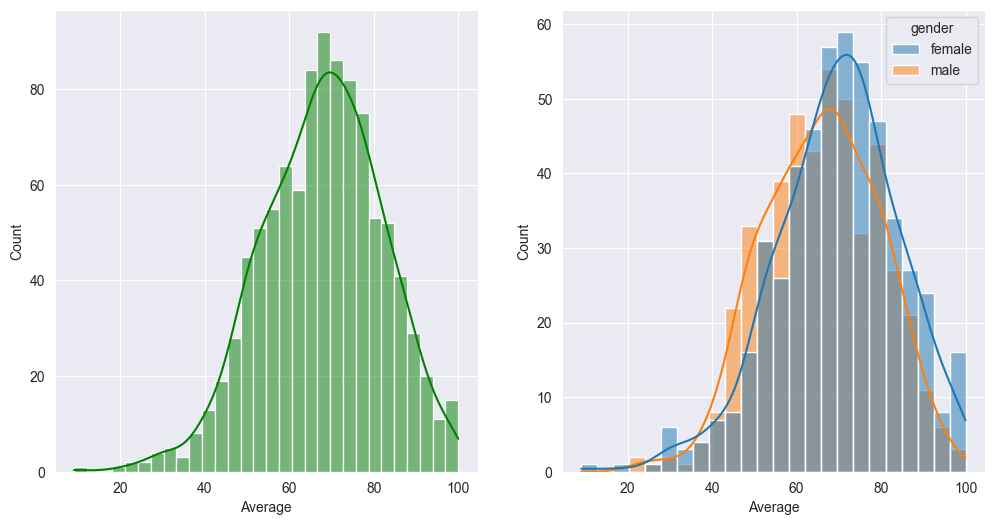

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')


<Axes: xlabel='Total Score', ylabel='Count'>

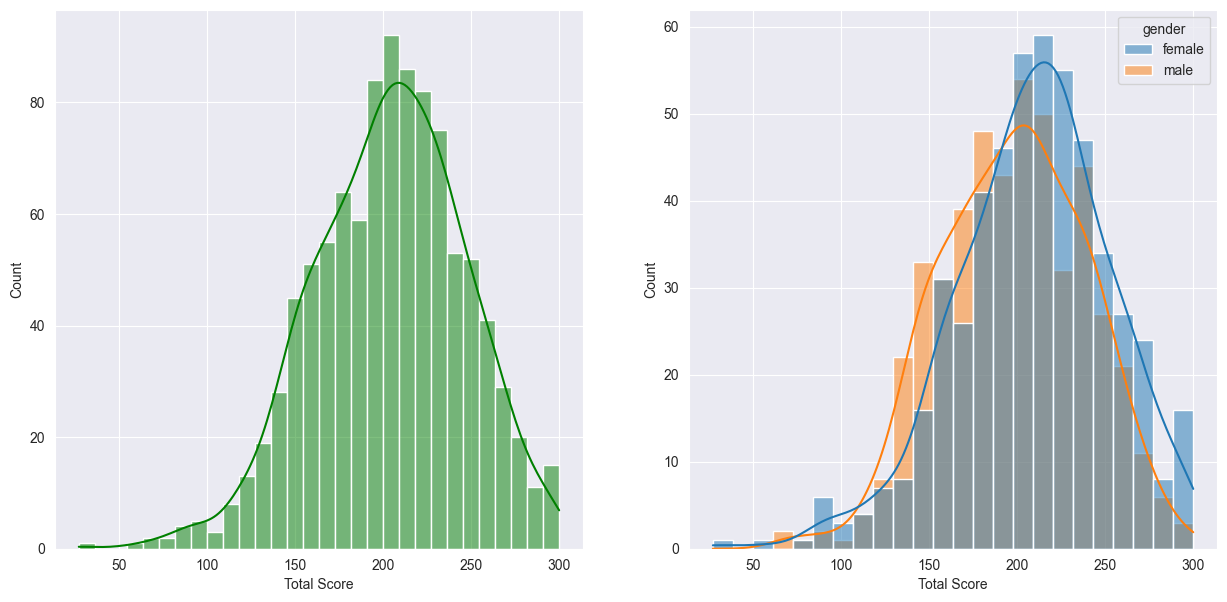

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')

<span style="color:violet">Insights</span>
*   Female students tend to perform well then male students.

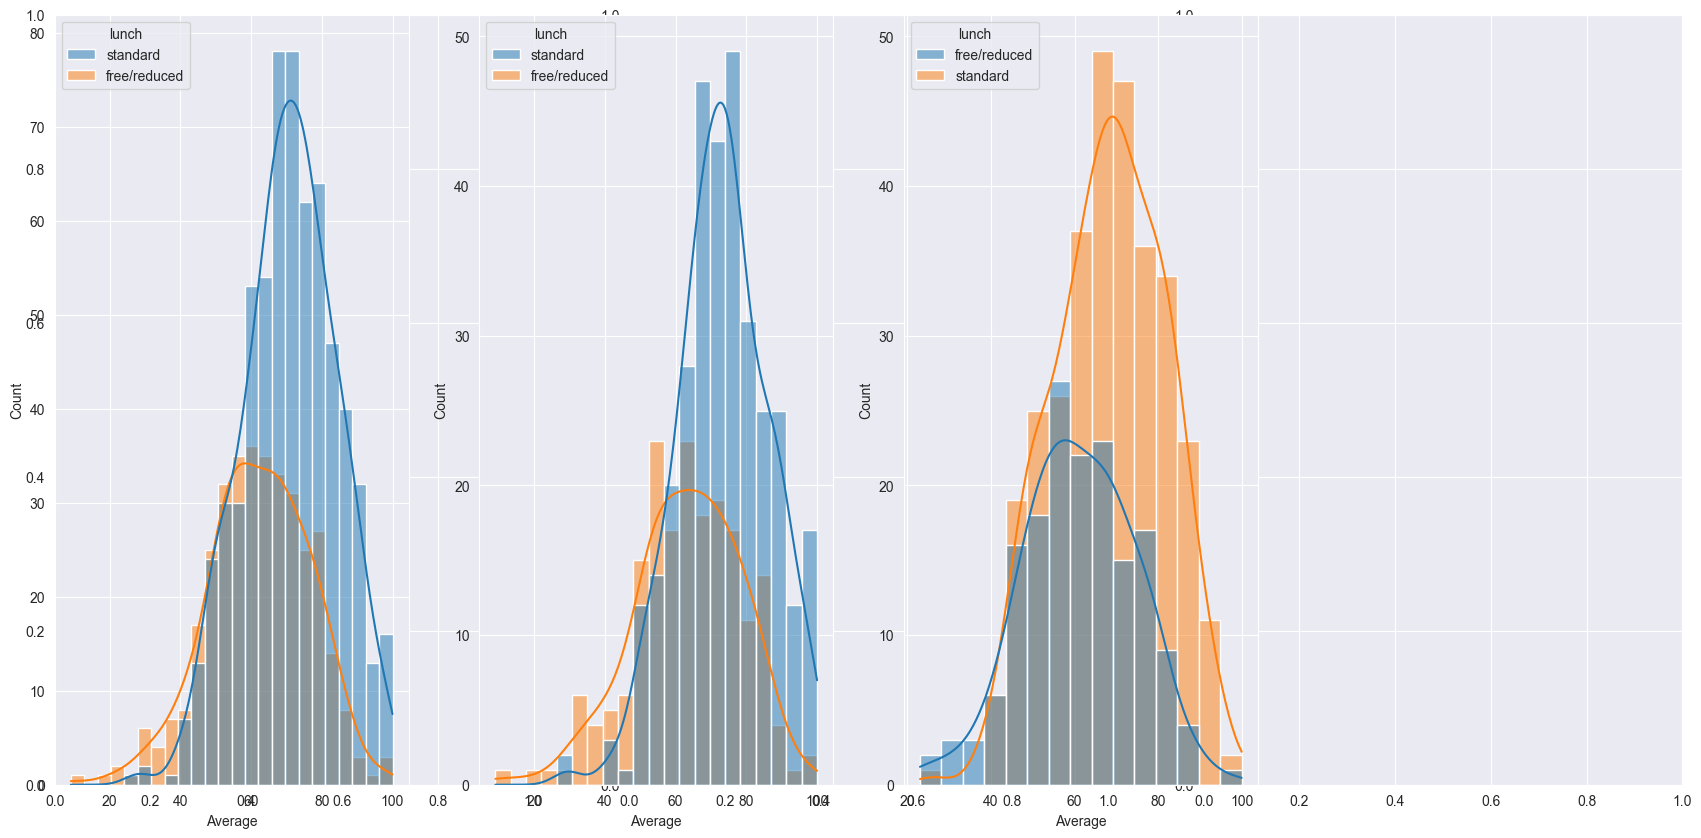

In [30]:
plt.subplots(1,3,figsize=(21,10))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

<span style="color:violet">Insights</span>
*   Standard lunch helps perform well in exams.
*   Standard lunch helps perform well in exams be it a male or a female.

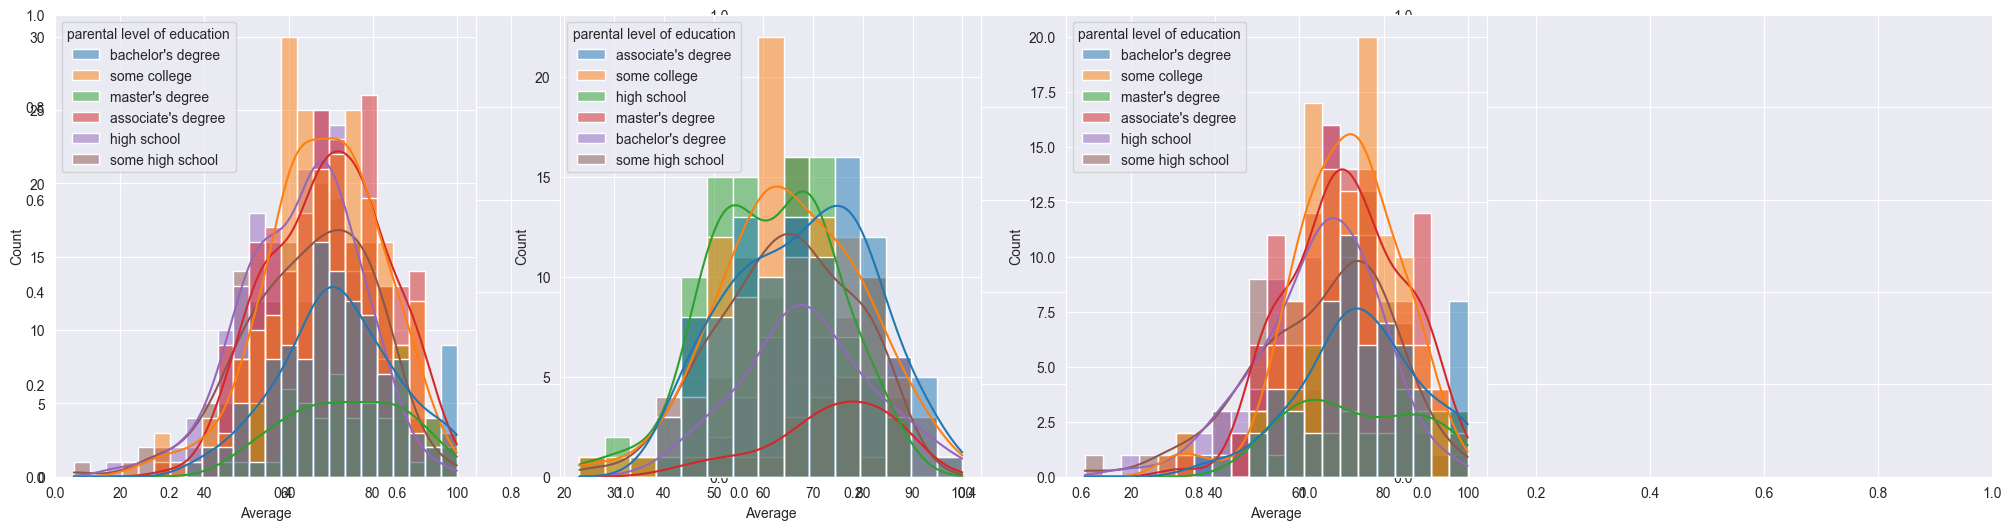

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

<span style="color:violet">Insights</span>
*   In general parent's education don't help student perform well in exam.
*   2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
*   3rd plot we can see there is no effect of parent's education on female students.

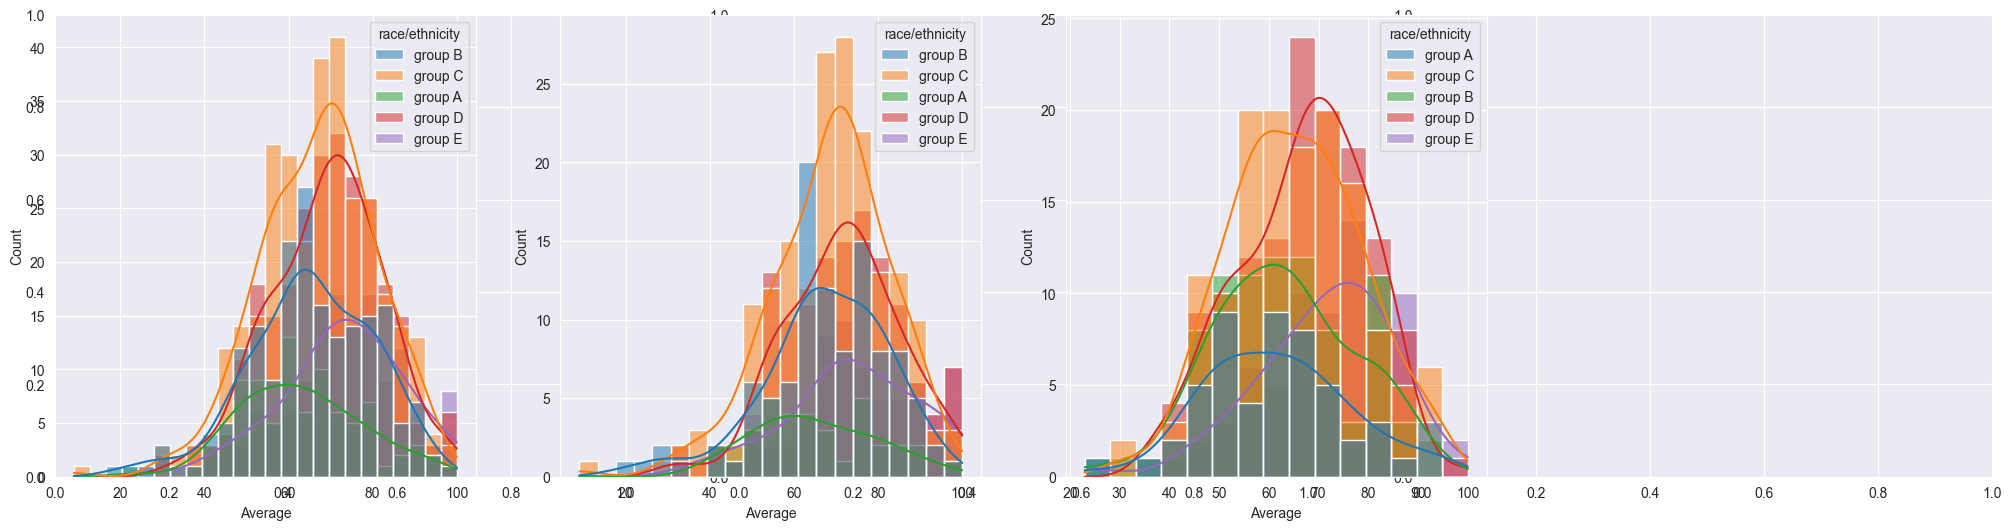

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

<span style="color:violet">Insights</span>
*   Students of group A and group B tends to perform poorly in exam.
*   Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### <span style="color:lime">4.2 Maximumum score of students in all three subjects</span>


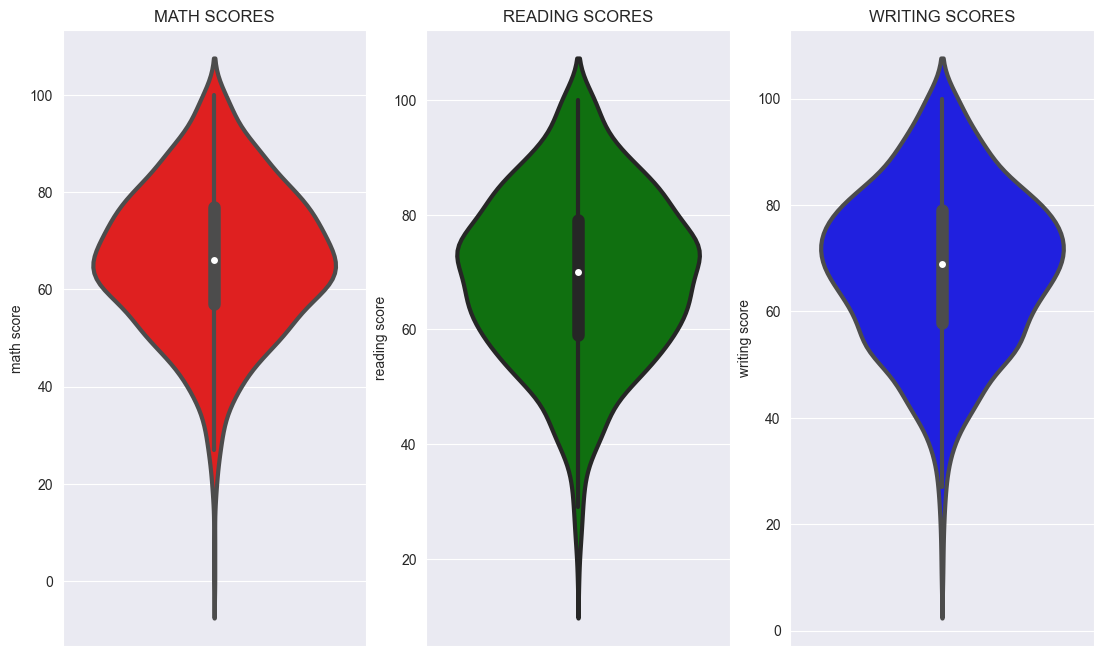

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

<span style="color:violet">Insights</span>
*   From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### <span style="color:lime">4.3 Multivariate analysis using pieplot</span>

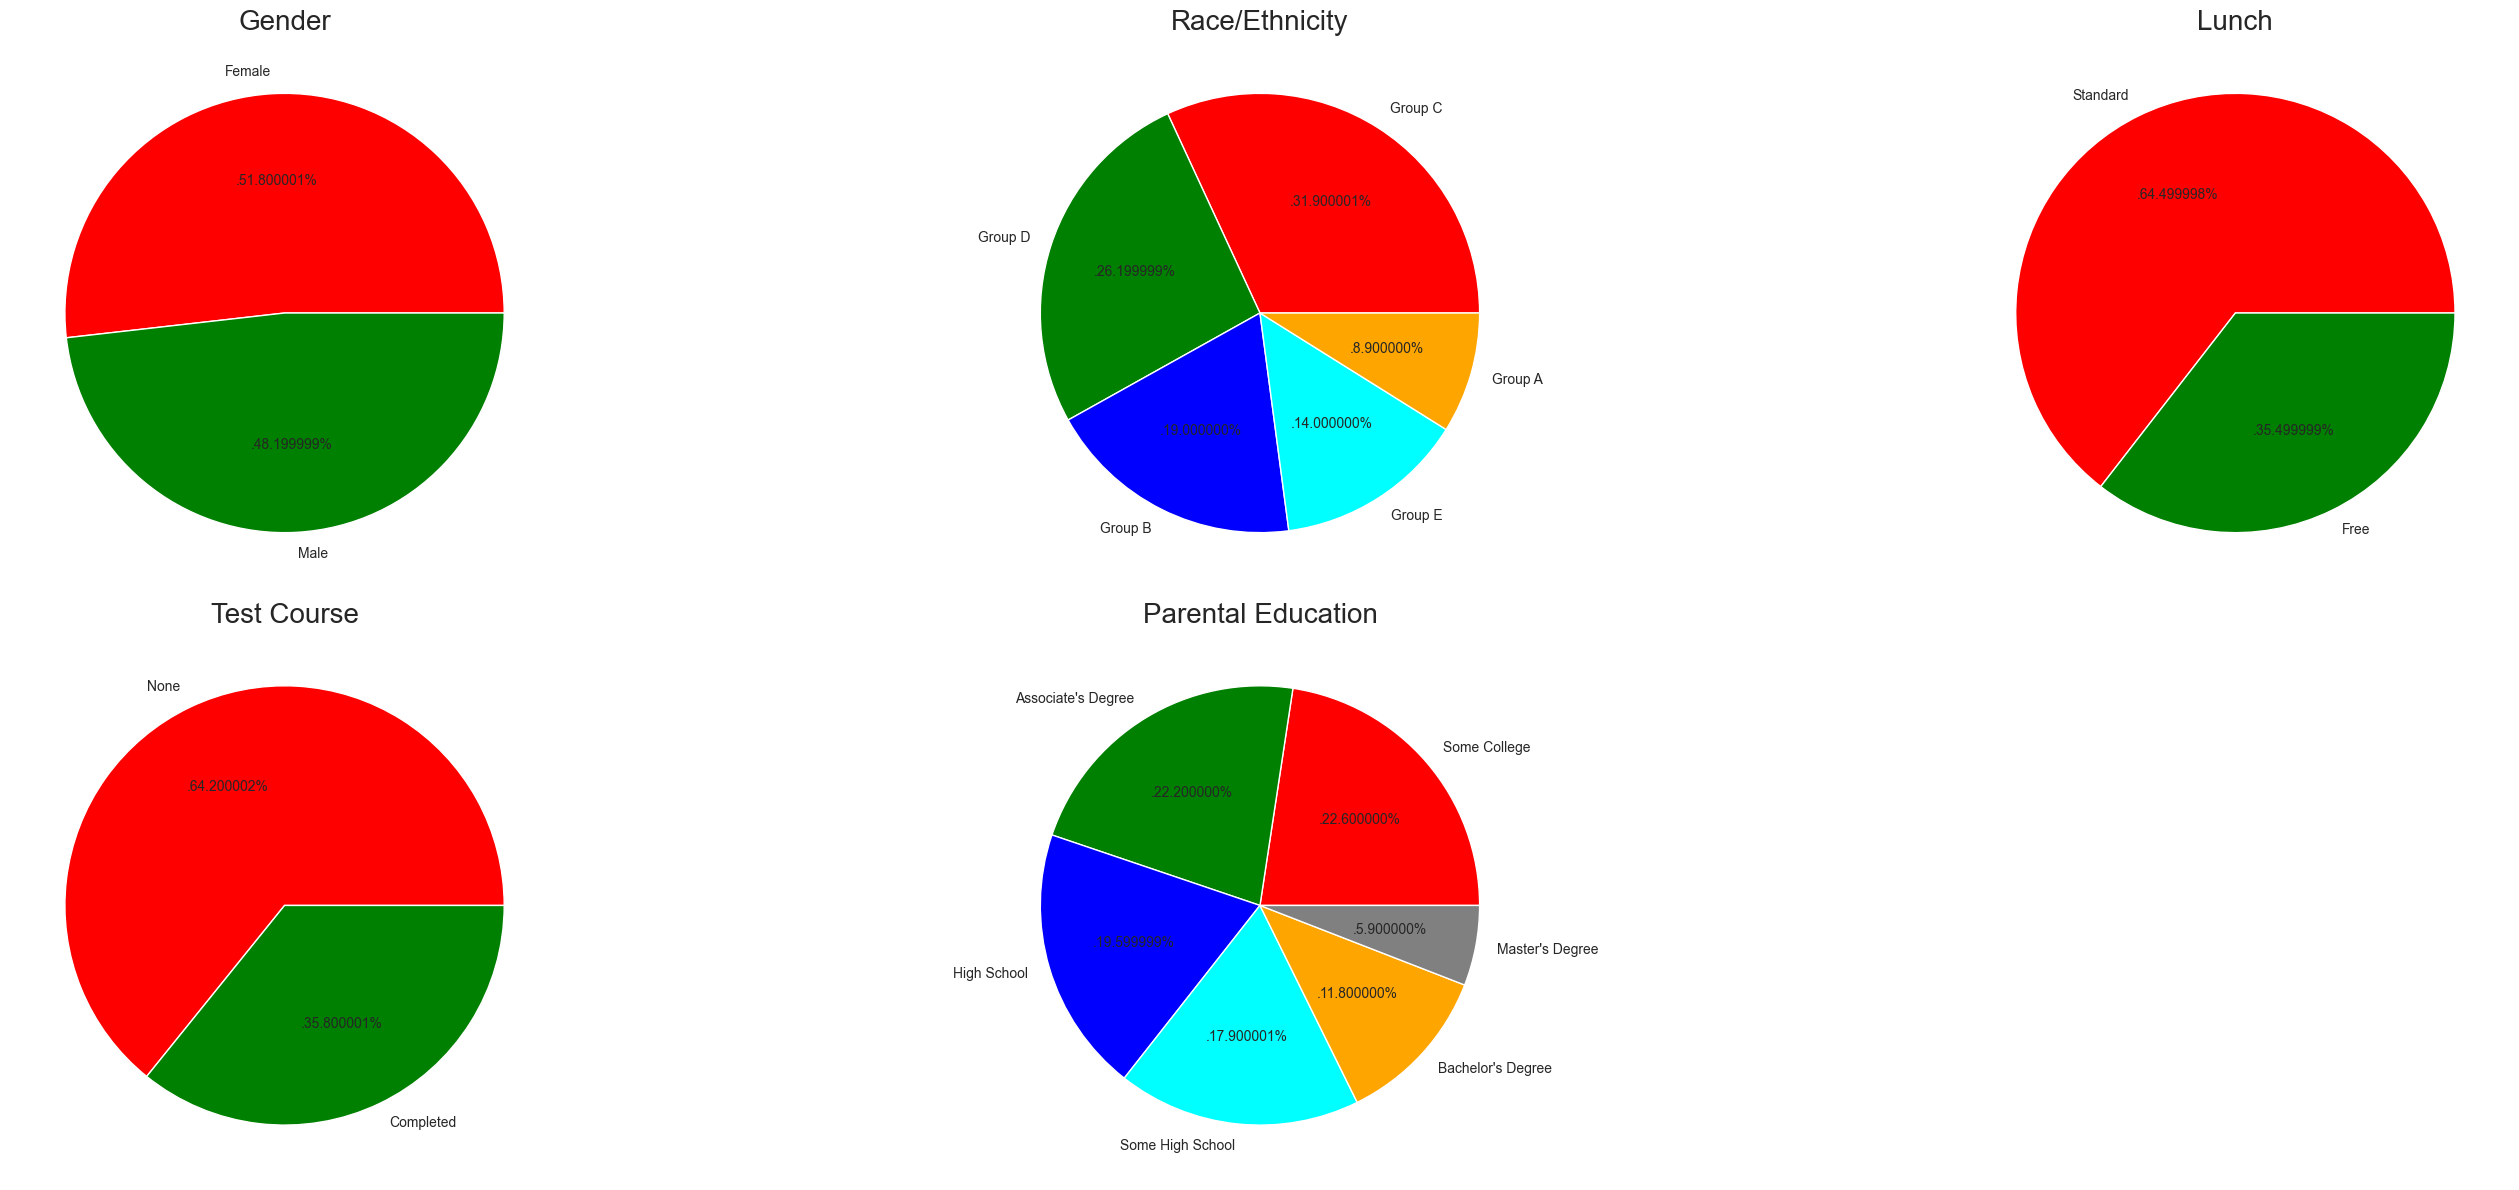

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

<span style="color:violet">Insights</span>
*   Number of Male and Female students is almost equal
*   Number students are greatest in Group C
*   Number of students who have standard lunch are greater
*   Number of students who have not enrolled in any test preparation course is greater
*   Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### <span style="color:lime">4.4 Feature Wise Visualization</span>


#### <span style="color:lime">4.4.1 GENDER COLUMN</span>
*   How is distribution of Gender ?
*   Does gender has any impact on student's performance ?

#### <span style="color:yellow"> UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

([<matplotlib.patches.Wedge at 0x25b88f115d0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

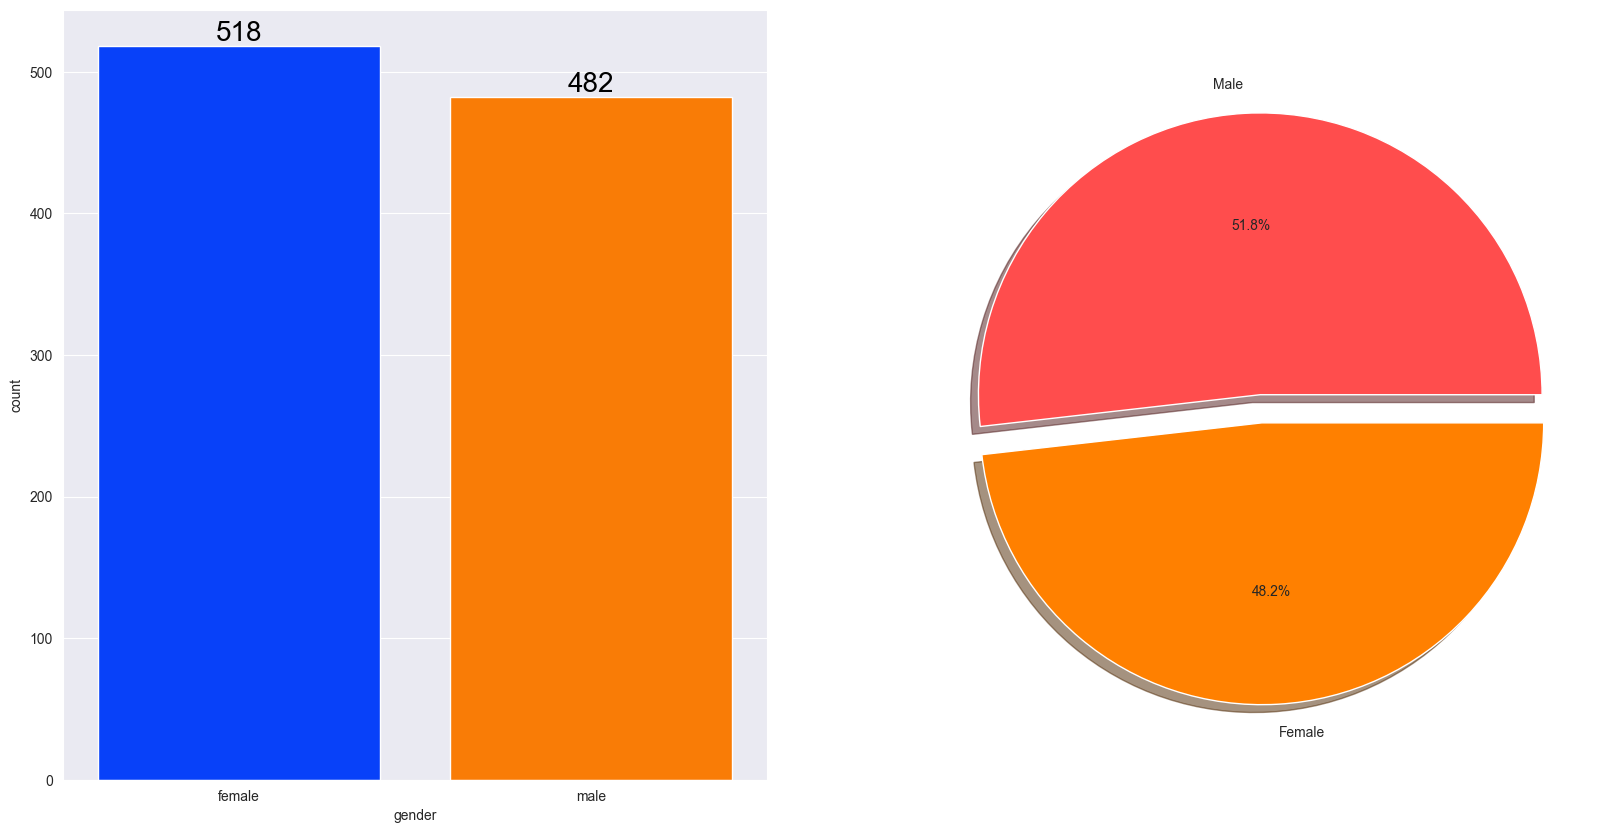

In [38]:
f, ax= plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

<span style="color:violet">Insights</span>
*   Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### <span style="color:yellow"> BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [47]:
gender_group= df.groupby('gender')

for cols in df.columns:
    if df[cols].dtype != 'O':
        print(f'{cols} mean = {gender_group[cols].mean()}', end='\n***********\n')

math score mean = gender
female    63.633205
male      68.728216
Name: math score, dtype: float64
***********
reading score mean = gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64
***********
writing score mean = gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64
***********
Total Score mean = gender
female    208.708494
male      197.512448
Name: Total Score, dtype: float64
***********
Average mean = gender
female    69.569498
male      65.837483
Name: Average, dtype: float64
***********


<span style="color:violet">Insights</span>
*   On an average females have a better overall score than men.
*   whereas males have scored higher in Maths.

#### <span style="color:lime">4.4.2 RACE/EHNICITY COLUMN</span>
*   How is Group wise distribution ?
*   Is Race/Ehnicity has any impact on student's performance ?

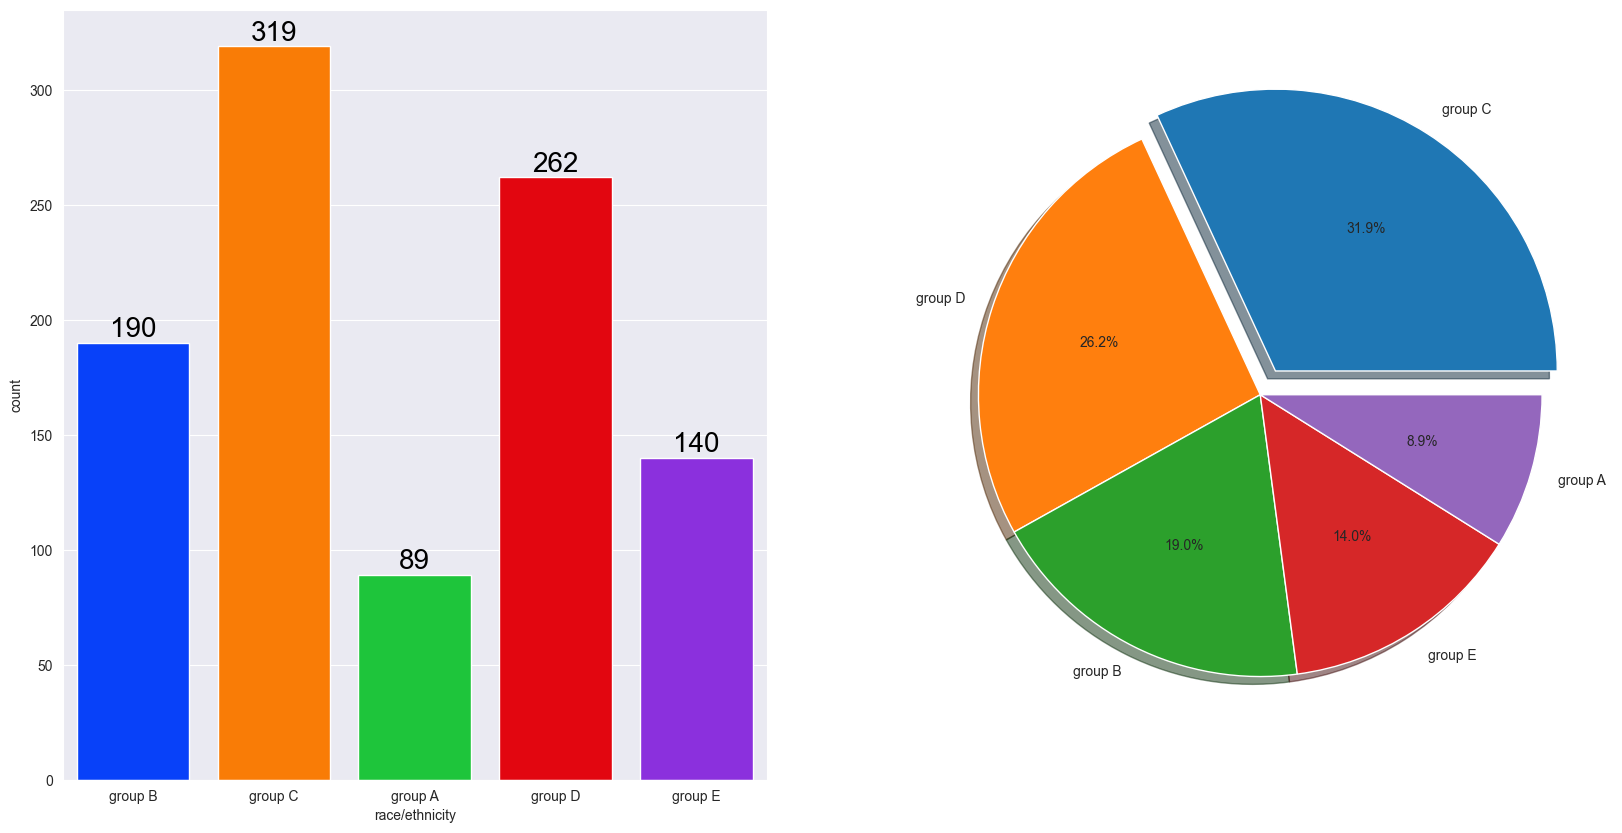

In [48]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

<span style="color:violet">Insights</span>
*   Most of the student belonging from group C /group D.
*   Lowest number of students belong to groupA.

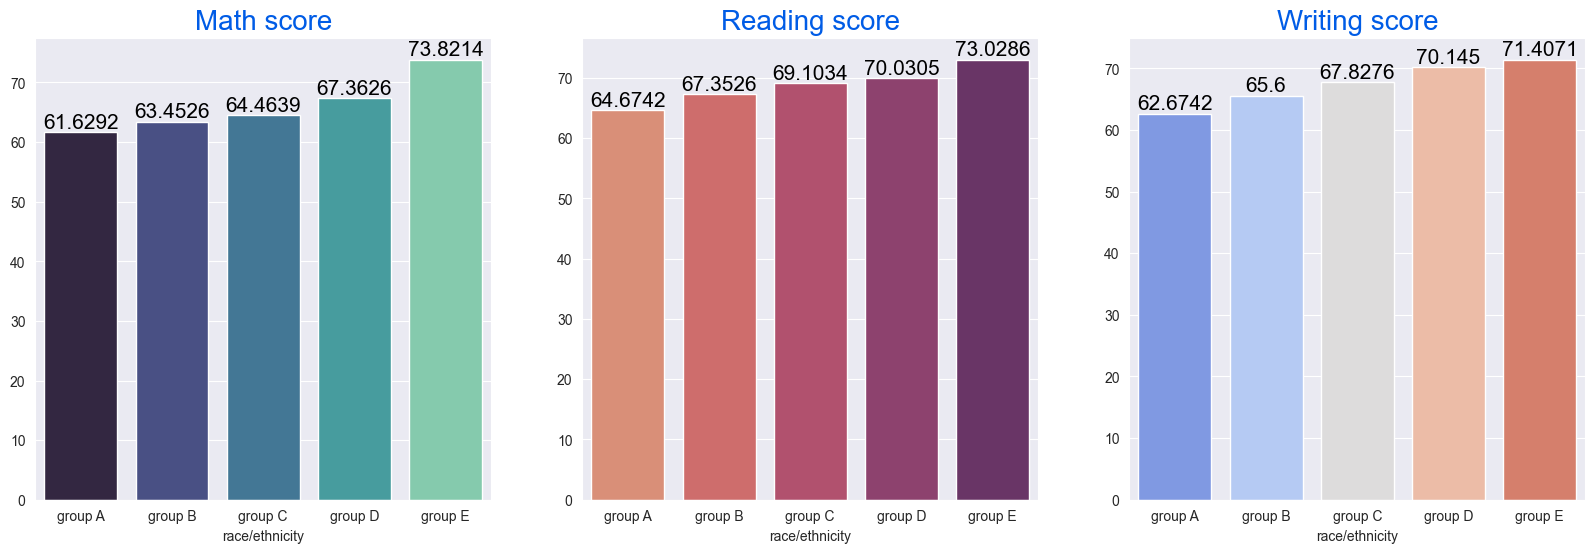

In [50]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


<span style="color:violet">Insights</span>
*   Group E students have scored the highest marks.
*   Group A students have scored the lowest marks.
*   Students from a lower Socioeconomic status have a lower avg in all course subjects

#### <span style="color:lime">4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN</span>

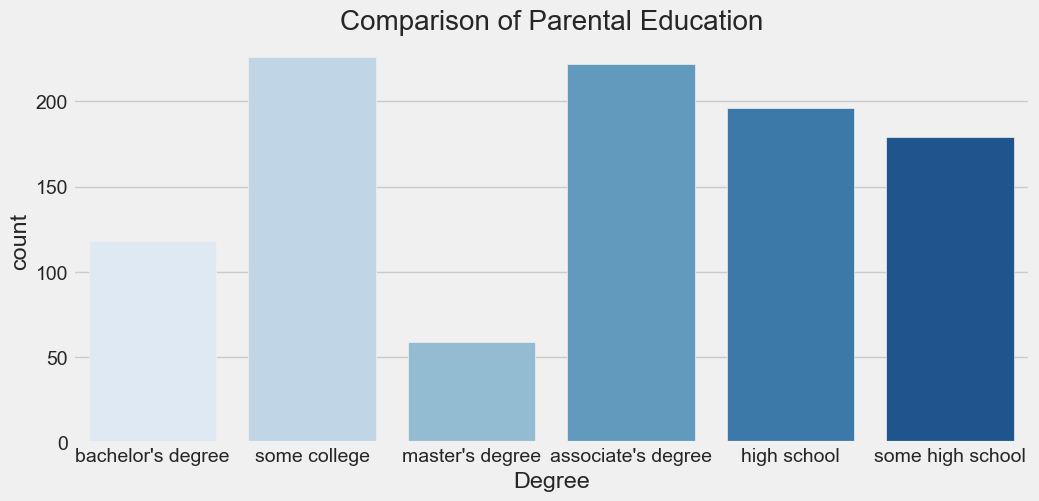

In [53]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

plt.rcParams['figure.figsize'] = (11, 5)
plt.style.use('fivethirtyeight')
sns.countplot(x='parental level of education', data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<span style="color:violet">Insights</span>
*   Largest number of parents are from some college.

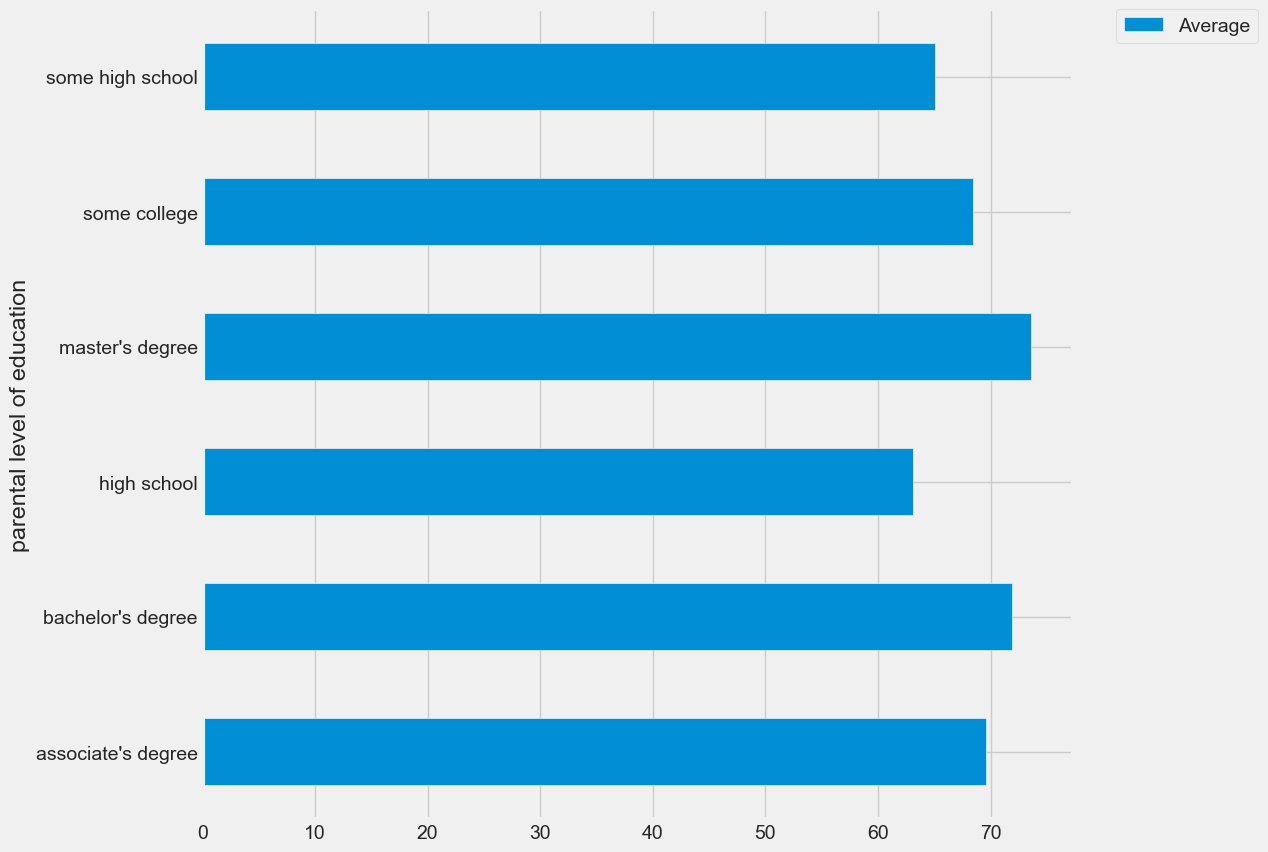

In [55]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

df.groupby('parental level of education')['Average'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<span style="color:violet">Insights</span>
*   The score of student whose parents possess master and bachelor level education are higher than others.

#### <span style="color:lime">4.4.4 LUNCH COLUMN</span>
*   Which type of lunch is most common amoung students ?
*   What is the effect of lunch type on test results?

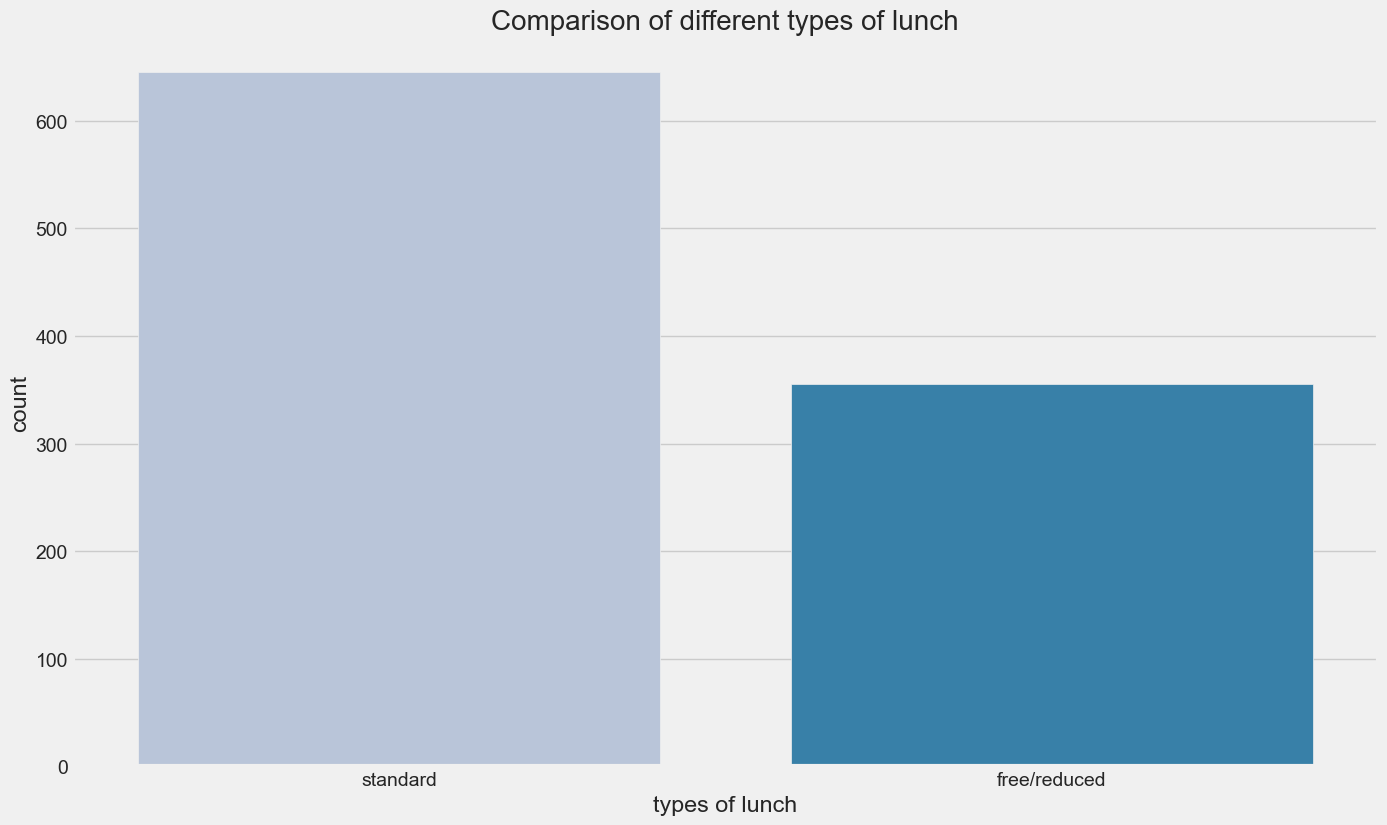

In [61]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(x='lunch', data=df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<span style="color:violet">Insights</span>
*   Students being served Standard lunch were more than free lunch

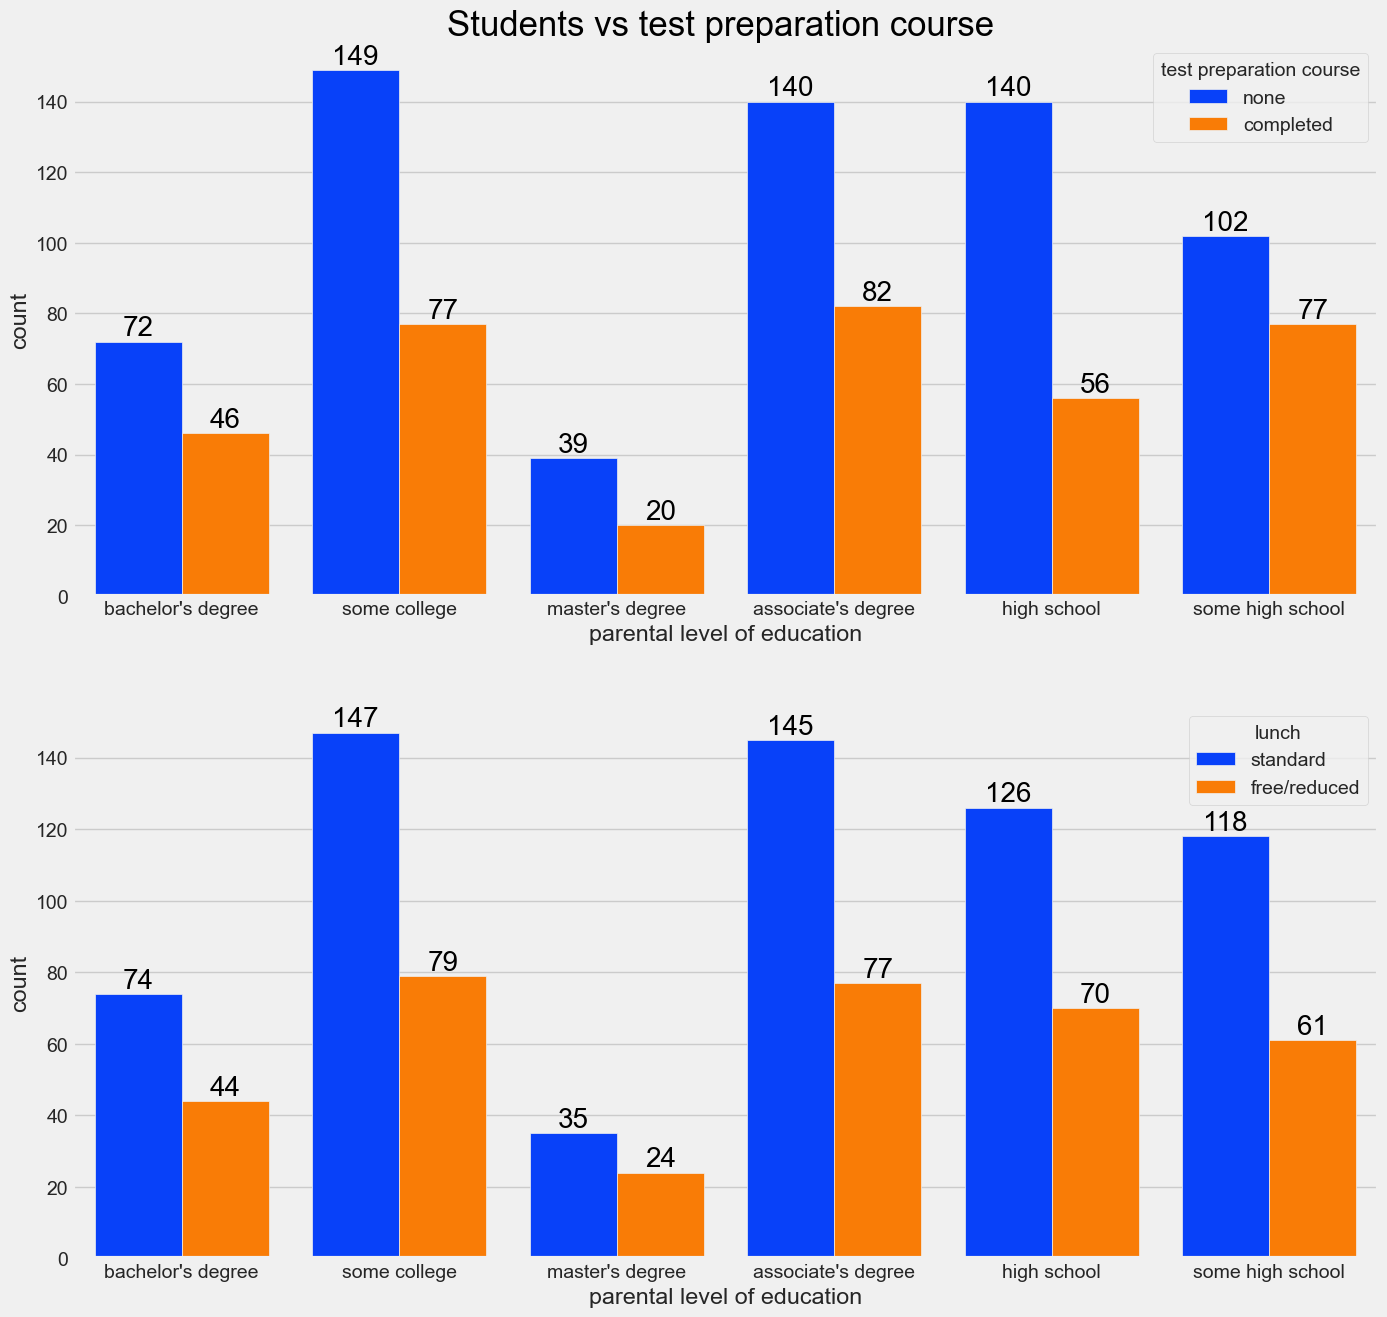

In [68]:
# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

f,ax=plt.subplots(2,1,figsize=(15,15))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

<span style="color:violet">Insights</span>
*   Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### <span style="color:lime">4.4.5 TEST PREPARATION COURSE COLUMN
*   Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

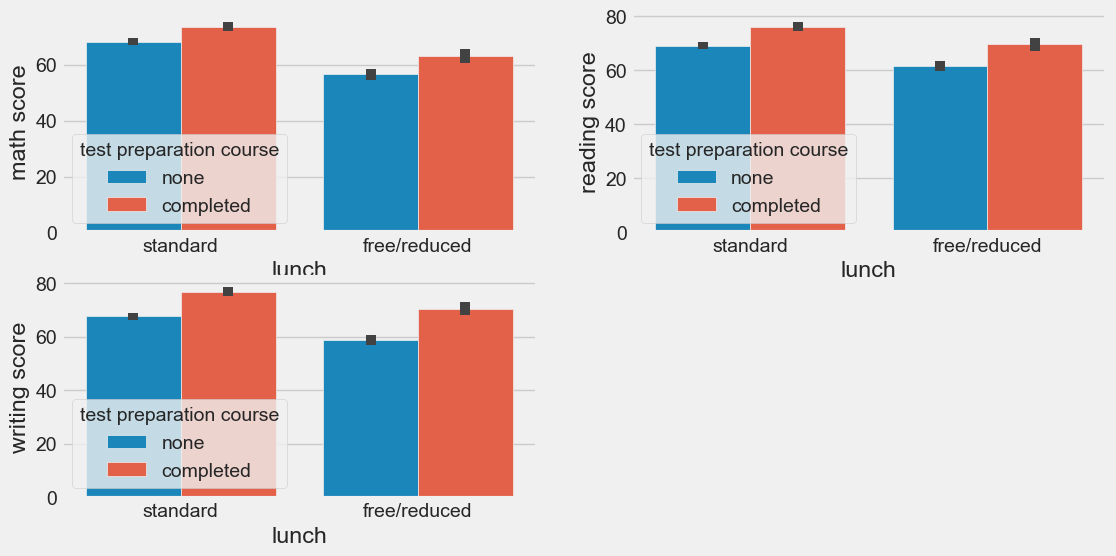

In [69]:
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

<span style="color:violet">Insights</span>
*   Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### <span style="color:lime">4.4.6 CHECKING OUTLIERS</span>

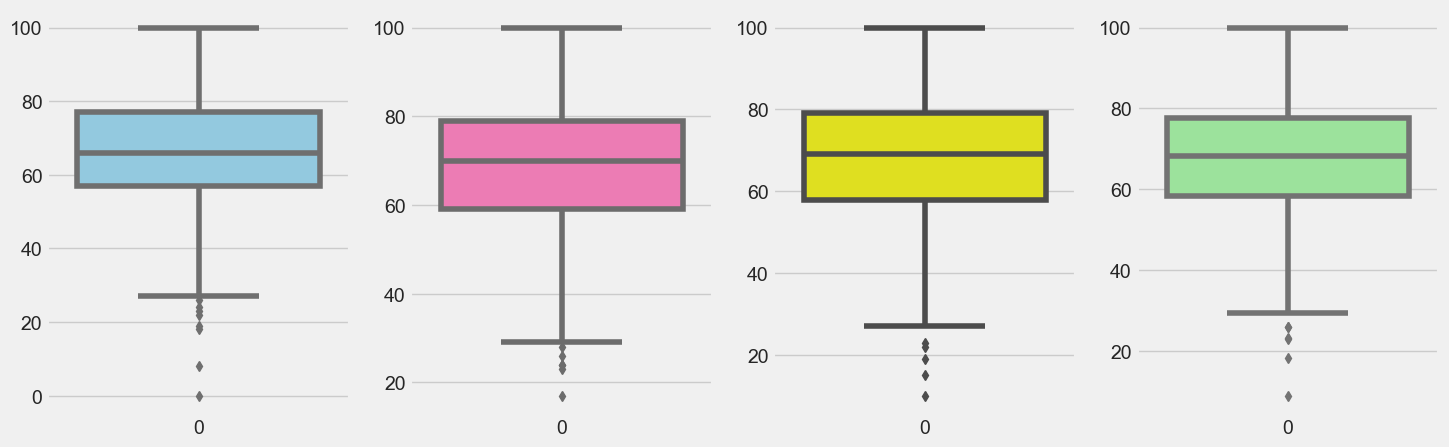

In [71]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### <span style="color:lime">4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

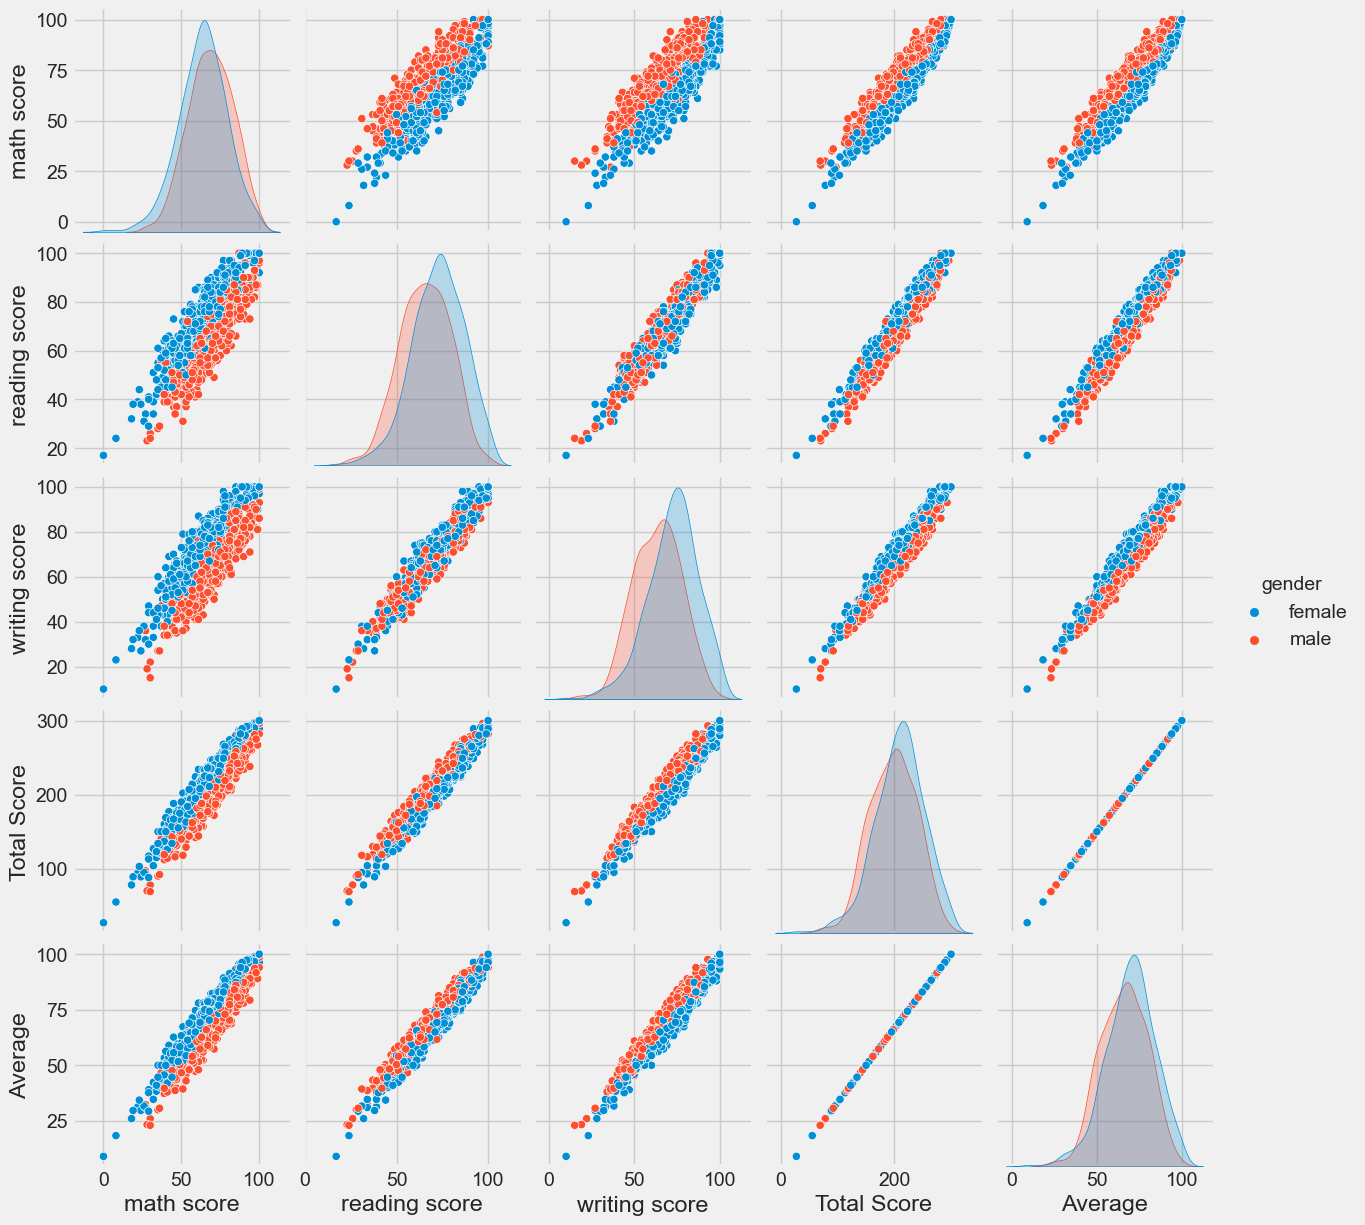

In [72]:
sns.pairplot(df,hue='gender')
plt.show()

<span style="color:violet">Insights</span>
*   From the above plot it is clear that all the scores increase linearly with each other.

# <span style="color:red; font-weight:bold">Conclusions:
*   Student's Performance is related with lunch, race, parental level education
*   Females lead in pass percentage and also are top-scorers
*   Student's Performance is not much related with test preparation course
*   Finishing preparation course is benefitial.